
<h1 style="text-align: center;"><u>SUPERVISED LEARNING</u> </h1> 
<h3 style="text-align: center;"> - HOW TO SELECT A MACHINE LEARNING MODEL ? <exp>*</exp> -  </h3> 
<br>
<br>
<i><b><exp>*</exp> NOTE:</b> deep learning not addressed here</i>

<h3><u>Table of content</u></h3>
<h5>I - Brief Overview of supervised learning</h5>
<h5>II - Proposed approach to pick a model</h5>
<h5>III - Example of Linear Regression </h5>
<h5>IV - Example of CLASSIFICATION </h5>
<h5>V - CONCLUSION </h5>


<br>
<br>
<br>
<hr>







<h3 style="text-align: left;"><u>I - Brief Overview of supervised learning</u> </h3> 



- <b> Use cases :</b> to predict temperature, sales, stock, cancer prediction, drug effect, etc...

- <b> Characteristics of supervised learning:</b> The output is known. The model takes dependent variables (features) as inputs and tries to match them to the known output values or labels. 


- <b> Two main modelisation approaches :</b> Regression / Classification <b>(deep learning not addressed here)</b>

1 - For continuous output data: Linear Regression

2 - For classification, either : 

$\;\;\;\;$ a) Linear separation:

$\;\;\;\;\;\;\;\;$    - Logistic Regression

$\;\;\;\;\;\;\;\;$    - Support Vector Machine (SVM: Goal to maximise the marginal distance between the separation plane to the marginal planes passing through support vectors )
    
$\;\;\;\;$ b) Euclidian Distance: 

$\;\;\;\;\;\;\;\;$    - K Nearest Neighbors (KNN)

$\;\;\;\;$ c) If/Else Nested Loops:

$\;\;\;\;\;\;\;\;$ - Decision Tree

$\;\;\;\;\;\;\;\;$ - combinaison of many decision trees: 

$\;\;\;\;\;\;\;\;\;\;\;\;$        - Random Forest      

$\;\;\;\;\;\;\;\;\;\;\;\;$        - xgBoost (extreme gradient boosting)

<i>Ref: https://www.youtube.com/watch?v=38SUUaMX5Rg</i>


<br>
<br>
<br>
<hr>



<h3 style="text-align: left;"><u>II - Proposed approach to pick a model</u> </h3> 

<p>The presented method takes the size of the dataset into account, the model training time. While some models would yield a more accurate prediction, they also take a tremendeous amount of time to train.</p>

<h4 >1- if the output data is linear and continuous: </h4>
then we select a linear regression model.

<h4>2- if the output is a classification:</h4>
The following models are used to solve Non Linear classification problem.
we then have to  understand which a classification model to select:

> <h5>A- Using Visualisation:</h5> 
use seaborn to visualise the bivariate data features  (pairplot 2 by 2) and whether the data points overlap.

> <h5> B- if the data do not overlap: </h5>
Use Logistic Regression / SVM, when the seaborn paiplot shows clear separations between groups of data.
Logistic Regression is used to deal with Linear Classification problem statements. It draws a separation line between the 2 Linear groups <b>that do not overlap</b>.

$\;\;\;\;\;\;\;\;\;\;\;\;$   - Should I pick LogisticRegression or SVM ? 
   
$\;\;\;\;\;\;\;\;\;\;\;\;$   (they have a similar performance): _Logistic regression and SVM with a linear kernel have similar performance but depending on your features, one may be more efficient than the other._

$\;\;\;\;\;\;\;\;\;\;\;\;$ <i>Ref: https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16</i>

$\;\;\;\;\;\;\;\;\;\;\;\;$ *n = number of features,*

$\;\;\;\;\;\;\;\;\;\;\;\;$ *m = number of training examples*

$\;\;\;\;\;\;\;\;\;\;\;\;$ *1. If n is large (1–10,000) and m is small (10–1000) : use logistic regression or SVM with a linear kernel.*

$\;\;\;\;\;\;\;\;\;\;\;\;$ *2. If n is small (1–10 00) and m is intermediate (10–10,000) : use SVM with (Gaussian, polynomial etc) kernel*

$\;\;\;\;\;\;\;\;\;\;\;\;$ *3. If n is small (1–10 00), m is large (50,000–1,000,000+): first, manually add more features and then use logistic regression or SVM with a linear kernel*

$\;\;\;\;\;\;\;\;\;\;\;\;$ $NOTE \over$: it is usually advisable to first try to use logistic regression to see how the model does, if it fails then you can try using SVM without a kernel (is otherwise known as SVM with a linear kernel).


> <h5>  C- If the data completly overlap and training time must be short: </h5>
Use KNN If the data completly overlap. the algorythm tries to identify Similarities of surrounding data based on the EUCLIDIAN Distance.

> <h5> D- If Knn (R-Square) score was not acceptable: </h5>
Use Decision Tree base models. The only drawback of using these type of models is in the  time necessary to train them as they are multiple NESTED if/Else loops which indeed takes longer time to Train. ( 
Decision Tree, Random Forest, xgBoost ) 



fig.1: Model RECOMMANDATION approach

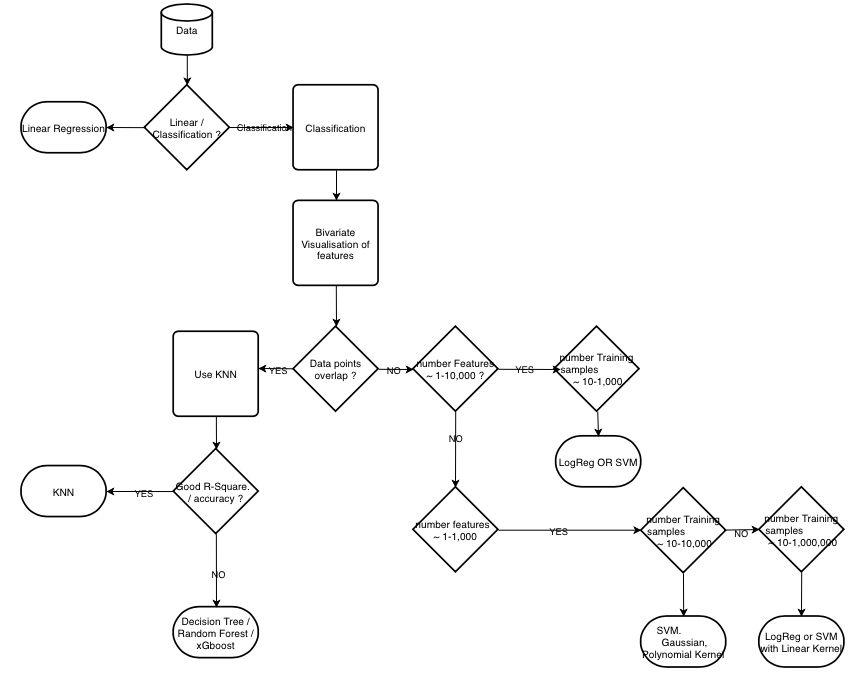


<br>
<br>
<br>
<hr>


### To illustrate this model selection approach, let's look at 2 examples. 
- 1st example with a dataset on Linear Regression 
- 2nd dataset on Classification ( <= more interesting in regards to the accuracy vs training time) 

<br>
<br>
<br>
<hr>

<h1><u>III - Example of Linear Regression</u></h1>

Note: the dataset is a record of the consumption of several types of consumers profil during blackfriday

<i>Ref: https://www.kaggle.com/datasets/llopesolivei/blackfriday </i>

<h3>1-  Dataset investigation and cleaning </h3>
<h3>2- A look at the Dataset imbalances</h3>
<h3>3- Multiple Linear Modelisation </h3>
<h4> 3.1- Model criteria for comparision between models</h4>
<h4> 3.2- Input / Output selection </h4>
<h4> 3.3- Regression without intercept </h4>
<h4> 3.4- Regression with intercept </h4>
<h4> 3.5- Best polynomial parameters search automation </h4>
<h3>4- VISUALISATION : APACHE SUPERSET </h3>

fig.2 Linear Regression

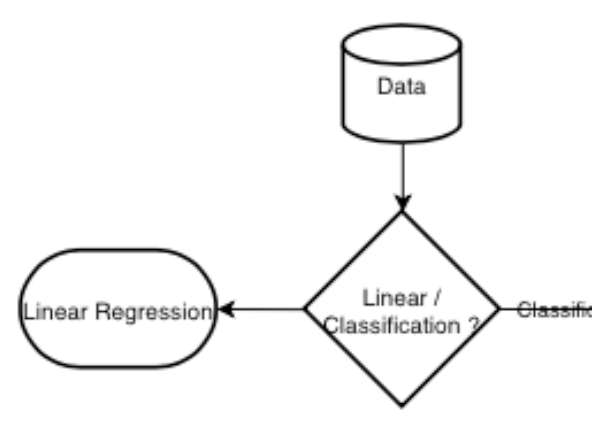

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
file = "data/train.csv"
df = pd.read_csv(file)

df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


<h3>1-  Data investigation and cleaning <h3>

In [3]:
df.count(axis=0, numeric_only=False)

User_ID                       550068
Product_ID                    550068
Gender                        550068
Age                           550068
Occupation                    550068
City_Category                 550068
Stay_In_Current_City_Years    550068
Marital_Status                550068
Product_Category_1            550068
Product_Category_2            376430
Product_Category_3            166821
Purchase                      550068
dtype: int64

In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
df = df.dropna()
df.reset_index()

,index,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
1,6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
2,13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
3,14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
4,16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166816,545902,1006039,P00064042,F,46-50,0,B,4+,1,3,4.0,12.0,8047
166817,545904,1006040,P00081142,M,26-35,6,B,2,0,6,8.0,14.0,16493
166818,545907,1006040,P00277642,M,26-35,6,B,2,0,2,3.0,10.0,3425
166819,545908,1006040,P00127642,M,26-35,6,B,2,0,1,2.0,15.0,15694


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  object 
 2   Gender                      166821 non-null  object 
 3   Age                         166821 non-null  object 
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  object 
 6   Stay_In_Current_City_Years  166821 non-null  object 
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 16.5+ MB


In [9]:
df['Product_ID'] = df['Product_ID'].convert_dtypes(convert_string=True)
df['Gender'] = df['Gender'].convert_dtypes(convert_string=True)
df['Age'] = df['Age'].convert_dtypes(convert_string=True)
df['City_Category'] = df['City_Category'].convert_dtypes(convert_string=True)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].convert_dtypes(convert_string=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  string 
 2   Gender                      166821 non-null  string 
 3   Age                         166821 non-null  string 
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  string 
 6   Stay_In_Current_City_Years  166821 non-null  string 
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
dtypes: float64(2), int64(5), string(5)
memory usage: 16.5 MB


In [10]:
# transforming columns to int:
# - 'Stay_In_Current_City_Years'
lines2replace = df.loc[(df['Stay_In_Current_City_Years']=='4+')].index
lines2replace = list(lines2replace)


df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(lambda s: s.replace('4+','4'))
df.loc[lines2replace]
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(int)

# - 'Product_Category_'
df['Product_Category_2'] = df['Product_Category_2'].apply(int)
df['Product_Category_3'] = df['Product_Category_3'].apply(int)
df.dtypes

User_ID                        int64
Product_ID                    string
Gender                        string
Age                           string
Occupation                     int64
City_Category                 string
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object

In [11]:
# Dummies

# - GENDER
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True )

# - AGE
age_dummies = pd.get_dummies(df['Age'])
df = pd.concat([df,age_dummies],axis=1)
df = df.drop(['Age'], axis='columns', inplace=False)

# - CITY
city_dummies = pd.get_dummies(df['City_Category'])
df = pd.concat([df,city_dummies],axis=1)
df = df.drop(['City_Category'], axis=1, inplace=False)




In [12]:
df

,User_ID,Product_ID,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,0-17,18-25,26-35,36-45,46-50,51-55,55+,A,B,C
1,1000001,P00248942,0,10,2,0,1,6,14,15200,1,0,0,0,0,0,0,1,0,0
6,1000004,P00184942,1,7,2,1,1,8,17,19215,0,0,0,0,1,0,0,0,1,0
13,1000005,P00145042,1,20,1,1,1,2,5,15665,0,0,1,0,0,0,0,1,0,0
14,1000006,P00231342,0,9,1,0,5,8,14,5378,0,0,0,0,0,1,0,1,0,0
16,1000006,P0096642,0,9,1,0,2,3,4,13055,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545902,1006039,P00064042,0,0,4,1,3,4,12,8047,0,0,0,0,1,0,0,0,1,0
545904,1006040,P00081142,1,6,2,0,6,8,14,16493,0,0,1,0,0,0,0,0,1,0
545907,1006040,P00277642,1,6,2,0,2,3,10,3425,0,0,1,0,0,0,0,0,1,0
545908,1006040,P00127642,1,6,2,0,1,2,15,15694,0,0,1,0,0,0,0,0,1,0


In [13]:
# Concatenate all categorical dummie values belonging to a same categorie, into single columns

# - city
df['B'] = df['B'].apply(lambda city: 2 if city==1 else 0)
df['C'] = df['C'].apply(lambda city: 3 if city==1 else 0)

df['city'] = df['A']|df['B']|df['C']
df = df.drop(['A','B','C'], axis=1, inplace=False)

# - Age

df['0-17'] = df['0-17'].apply(lambda age: 1 if age==1 else 0)
df['18-25']= df['18-25'].apply(lambda age: 2 if age==1 else 0)
df['26-35']= df['26-35'].apply(lambda age: 3 if age==1 else 0)
df['36-45']= df['36-45'].apply(lambda age: 4 if age==1 else 0)
df['46-50']= df['46-50'].apply(lambda age: 5 if age==1 else 0)
df['51-55']= df['51-55'].apply(lambda age: 6 if age==1 else 0)
df['55+']  = df['55+'].apply(lambda age: 7 if age==1 else 0)

df['Age']=df['0-17'] |df['18-25'] | df['26-35'] | df['36-45'] | df['46-50'] | df['51-55'] | df['55+']
df = df.drop(['0-17','18-25','26-35','36-45','46-50','51-55','55+'],axis=1,inplace=False)

df

,User_ID,Product_ID,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,city,Age
1,1000001,P00248942,0,10,2,0,1,6,14,15200,1,1
6,1000004,P00184942,1,7,2,1,1,8,17,19215,2,5
13,1000005,P00145042,1,20,1,1,1,2,5,15665,1,3
14,1000006,P00231342,0,9,1,0,5,8,14,5378,1,6
16,1000006,P0096642,0,9,1,0,2,3,4,13055,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
545902,1006039,P00064042,0,0,4,1,3,4,12,8047,2,5
545904,1006040,P00081142,1,6,2,0,6,8,14,16493,2,3
545907,1006040,P00277642,1,6,2,0,2,3,10,3425,2,3
545908,1006040,P00127642,1,6,2,0,1,2,15,15694,2,3


In [14]:
# Investigation of dataset imbalances
print('GENDER:', '\n', df['Gender'].value_counts(normalize=True), '\n')
print('OCCUPATION: ', '\n',df['Occupation'].value_counts(normalize=True), '\n')
print('MARIED: ', '\n', df['Marital_Status'].value_counts(normalize=True), '\n')

print('Age: 1=> 0-17 / 2=> 18-25 / 3=> 26-35 / 4=> 36-45 / 5=> 46-50 / 6=> 51-55 / 57=>5+  ', '\n', df['Age'].value_counts(normalize=True), '\n')




GENDER: 
 1    0.774645
0    0.225355
Name: Gender, dtype: float64 

OCCUPATION:  
 4     0.134060
0     0.125710
7     0.106713
17    0.084336
1     0.080991
12    0.062834
20    0.055287
14    0.050275
2     0.045204
16    0.043957
6     0.034864
3     0.030062
10    0.025962
15    0.023894
5     0.023222
11    0.019590
19    0.014447
13    0.012271
18    0.011887
9     0.011186
8     0.003249
Name: Occupation, dtype: float64 

MARIED:  
 0    0.597161
1    0.402839
Name: Marital_Status, dtype: float64 

Age: 1=> 0-17 / 2=> 18-25 / 3=> 26-35 / 4=> 36-45 / 5=> 46-50 / 6=> 51-55 / 57=>5+   
 3    0.401280
4    0.199525
2    0.187722
5    0.080170
6    0.066934
7    0.035157
1    0.029211
Name: Age, dtype: float64 



 <h3>2- A look at the Dataset imbalances: </h3>
 
#### NOTE: imbalances were not mitigated in this example
 
 - Gender is focused on male ~ 80% vs 20%
 
 - Age observed follows a normal distribution and is mostly centered on 26-35, 36-45,18-25 
 
 - Occupations are centered on 4,0,7,17,1,12

array([[<Axes: title={'center': 'User_ID'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Stay_In_Current_City_Years'}>,
        <Axes: title={'center': 'Marital_Status'}>,
        <Axes: title={'center': 'Product_Category_1'}>],
       [<Axes: title={'center': 'Product_Category_2'}>,
        <Axes: title={'center': 'Product_Category_3'}>,
        <Axes: title={'center': 'Purchase'}>],
       [<Axes: title={'center': 'city'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

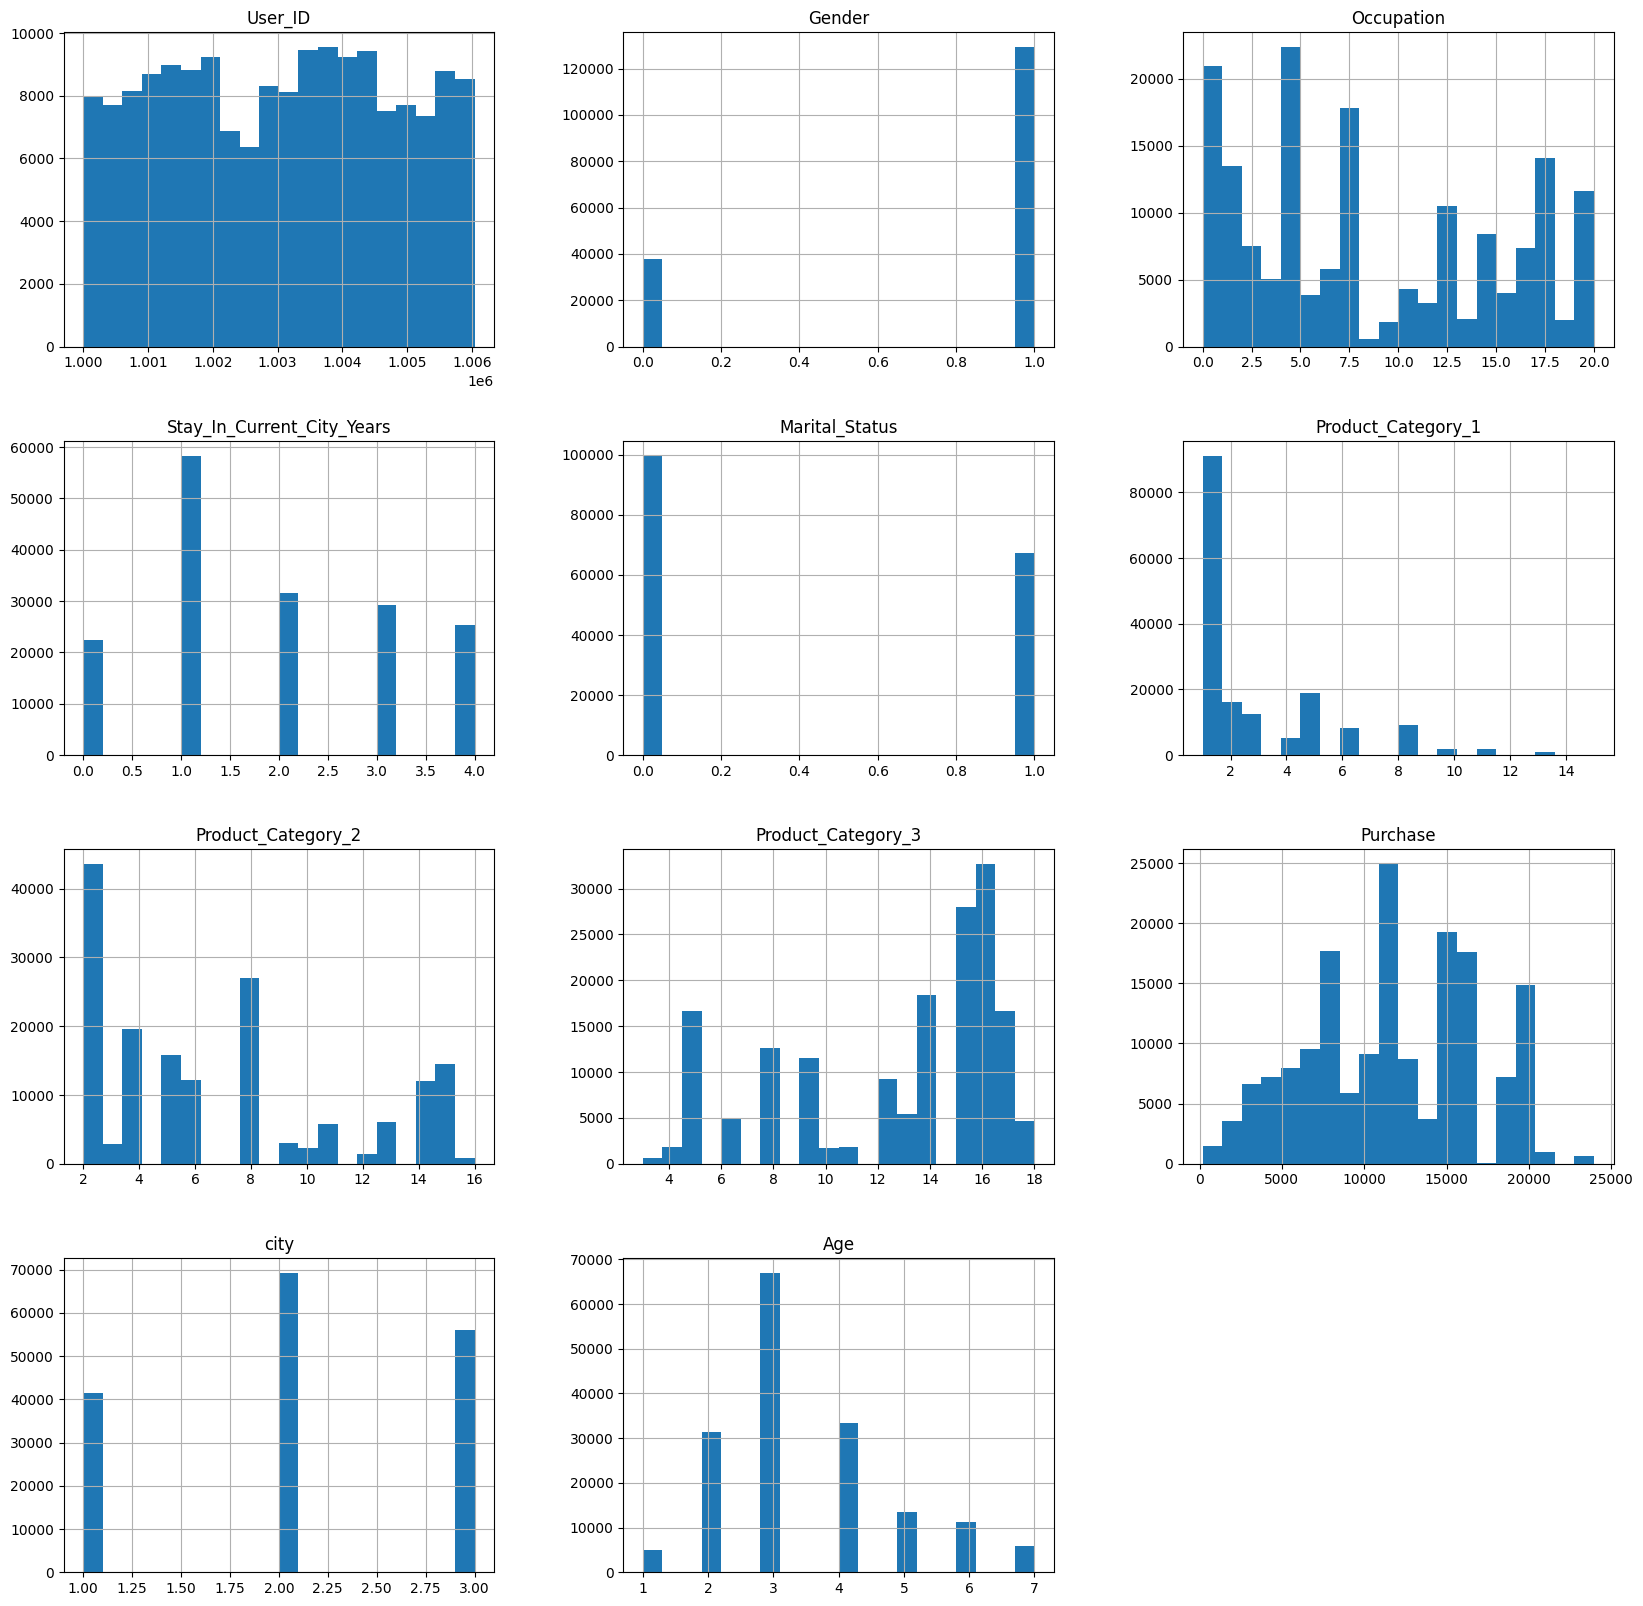

In [16]:
df.hist(figsize=(20,20),bins=20)

<h3>3- MULTIPLE LINEAR MODELISATION <h3>

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, r2_score,mean_squared_error

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix,classification_report,roc_curve

import statsmodels.api as sm

import scipy.stats
import scipy.special

import math

<h4> 3.1- Model criteria for comparision between models</h4>


For this context we will use the RMSE as a criteria to evaluate the accuracy of our model:

here the concern is the prediction accuracy and we want to assess how well the model predicts the target variable, RMSE is a suitable choice.

<b>NOTE:</b> if we had been more interested in understanding the model's ability to explain the variability in the data and its overall performance in terms of the explained variance, R2 would have been a good choice. We would have focused on the models ability in generalization rather than overfitting.

Here are the calculation details: 

- RootMeanSquareError(RMSE) : measures the average difference between the predicted values and the actual values in a regression or prediction model.

RMSE = sqrt((1/n) * Σ(yi - ŷi)²)

- Standard Deviation (σ):  standard deviation is used to measure the dispersion or variability of a set of values around their mean

σ = sqrt((1/n) * Σ(xi - μ)²)

- R-squared (R2): score is a statistical measure used to evaluate the goodness of fit of a regression model.

R2 = 1 - (SSR/SST)

with: 

SSR = Σ(y - ŷ)²

SST = Σ(y - ȳ)²

<h4>3.2- Input / Output selection </h4>

#### Our output will be the purchase price

#### our dependent variables will be the other variables

In [18]:


df = df.sort_values(by=['Purchase'])

y_gen = df[['Purchase']]
#'Product_Category_1','Product_Category_2','Product_Category_3',
x_gen = df.drop(['User_ID','Product_ID', 'Purchase'],axis=1)

#y_maried = df[['Marital_Status']]
#x_maried = df.drop(['User_ID','Product_ID', 'Gender','0-17','18-25','36-45','46-50','51-55','55+'],axis=1)
      
        

In [19]:
x_gen

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,city,Age
377309,0,1,1,0,13,14,16,2,4
411541,1,4,0,0,13,14,16,1,2
233619,0,1,1,0,13,14,16,2,3
5466,1,20,1,0,13,14,16,1,5
172340,1,17,0,0,13,14,16,3,7
...,...,...,...,...,...,...,...,...,...
68926,1,4,1,1,10,13,16,3,3
126614,1,0,3,0,10,15,16,2,1
416883,1,4,4,0,10,13,16,2,2
7542,1,0,1,1,10,13,16,3,7


<h4>3.3- Regression without intercept </h4>

In [20]:

x_gen_train, x_gen_test, y_gen_train, y_gen_test = train_test_split(x_gen, y_gen, test_size=0.3, random_state=42)

#pipeline = make_pipeline(StandardScaler(),LinearRegression())
#model_gen = pipeline.fit(x_gen_train,y_gen_train)
model_gen = LinearRegression().fit(x_gen_train,y_gen_train)
model_gen_statsmdl = sm.OLS(y_gen_train,x_gen_train).fit()




In [21]:
model_gen_statsmdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Purchase   R-squared (uncentered):                   0.840
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                          6.808e+04
Date:                Sun, 02 Jul 2023   Prob (F-statistic):                        0.00
Time:                        15:50:11   Log-Likelihood:                     -1.1622e+06
No. Observations:              116774   AIC:                                  2.324e+06
Df Residuals:                  116765   BIC:                                  2.325e+06
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Gender                      1940.1721     34.063     56.959      0.000    1873.410    2006.934
Occupation                    49.2366      2.304     21.374      0.000      44.722      53.752
Stay_In_Current_City_Years   438.4253     11.191     39.177      0.000     416.491     460.359
Marital_Status               -13.3827     31.943     -0.419      0.675     -75.990      49.224
Product_Category_1          -715.4144      6.667   -107.310      0.000    -728.481    -702.348
Product_Category_2           -19.7699      4.415     -4.477      0.000     -28.424     -11.116
Product_Category_3           355.4487      3.802     93.489      0.000     347.997     362.901
city                        1705.8900     17.428     97.885      0.000    1671.732    1740.048
Age                          746.2539     11.046     67.560      0.000     724.604     767.903
==============================================================================
Omnibus:                      649.772   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              639.759
Skew:                           0.166   Prob(JB):                    1.20e-139
Kurtosis:                       2.854   Cond. No.                         42.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Interpretation:</b>

The Pvalue (Marital_Status) > 0.05

Which means this coefficient is not a meaningful in the accuracy of the model if we were to pick a model criteria based on R2.



In [22]:
pred_statsmdl1 = model_gen_statsmdl.predict(x_gen_test)
pred_statsmdl1

181885    16738.848949
402984    15404.988122
23672     14544.606338
498437    13989.245105
499611     5959.495749
              ...     
22947      9640.033306
95172     14842.983837
85316      8263.253219
435874    10554.861748
27080     15047.922963
Length: 50047, dtype: float64

In [28]:
from sklearn.metrics import make_scorer, r2_score,mean_squared_error

In [29]:

print('RMSE =', np.sqrt(mean_squared_error(y_gen_test,pred_statsmdl1))) # RSME used to compare models to each others

RMSE = 5062.50923292348


<h4>3.4- Regression with intercept </h4>

In [30]:
X_gen = sm.add_constant(x_gen)
X_gen = X_gen.drop(['Marital_Status'],axis=1)
X_gen

,const,Gender,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,city,Age
377309,1.0,0,1,1,13,14,16,2,4
411541,1.0,1,4,0,13,14,16,1,2
233619,1.0,0,1,1,13,14,16,2,3
5466,1.0,1,20,1,13,14,16,1,5
172340,1.0,1,17,0,13,14,16,3,7
...,...,...,...,...,...,...,...,...,...
68926,1.0,1,4,1,10,13,16,3,3
126614,1.0,1,0,3,10,15,16,2,1
416883,1.0,1,4,4,10,13,16,2,2
7542,1.0,1,0,1,10,13,16,3,7


In [31]:
print(X_gen.shape)
print(y_gen.shape)

(166821, 9)
(166821, 1)


In [32]:

X_gen_train, X_gen_test, Y_gen_train, Y_gen_test = train_test_split(X_gen, y_gen, test_size=0.3, random_state=42)

model_gen_statsmdl_intercpt = sm.OLS(Y_gen_train,X_gen_train).fit()
model_gen_statsmdl_intercpt.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     2954.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:54:06   Log-Likelihood:            -1.1516e+06
No. Observations:              116774   AIC:                         2.303e+06
Df Residuals:                  116765   BIC:                         2.303e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.115e+04     72.821    153.088      0.000     1.1e+04    1.13e+04
Gender                       318.3811     32.840      9.695      0.000     254.014     382.748
Occupation                     7.5647      2.120      3.569      0.000       3.410      11.719
Stay_In_Current_City_Years    21.6886     10.569      2.052      0.040       0.974      42.403
Product_Category_1          -828.4442      6.129   -135.173      0.000    -840.456    -816.432
Product_Category_2            26.1034      4.041      6.460      0.000      18.184      34.023
Product_Category_3            72.0224      3.933     18.313      0.000      64.314      79.731
city                         420.0067     17.985     23.354      0.000     384.757     455.256
Age                          131.0340     10.315     12.703      0.000     110.817     151.251
==============================================================================
Omnibus:                     1464.909   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1564.088
Skew:                           0.255   Prob(JB):                         0.00
Kurtosis:                       3.247   Cond. No.                         100.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
pred_statsmdl2 = model_gen_statsmdl_intercpt.predict(X_gen_test)
pred_statsmdl2

181885    13784.176017
402984    13795.107441
23672     13483.173495
498437    10730.308135
499611     7157.152800
              ...     
22947      7926.092056
95172     13520.424490
85316      5574.622814
435874    12627.875556
27080     13678.197297
Length: 50047, dtype: float64

In [35]:


print('RMSE =', np.sqrt(mean_squared_error(Y_gen_test,pred_statsmdl2))) 


RMSE = 4614.769165881504


<h4>3.5- Best polynomial parameters search automation </h4>

<p> it would take a long time to evaluate different options for what the best parameters of our multiple  linear regression would be.</p>
<br>let's automate the search:

In [44]:

from sklearn.preprocessing import PolynomialFeatures


PolynomialRegression = make_pipeline(PolynomialFeatures(),LinearRegression())

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score,mean_squared_error

param_grid = {'polynomialfeatures__degree': [1,2,3],  #explored polynomial degrees  
              'linearregression__fit_intercept': [False,True], # whether we use the intercept
             'linearregression__normalize': [True, False],
             } # whether to normalize the input: all features on the same scale

# define what criteria defines the best model: minimize the MSE
custom_scorer = make_scorer(mean_squared_error, greater_is_better=True) #mean_squared_error returns the negated MSE

# PolynomialRegression() : is a pipeline created earlier in a cell above
grid = GridSearchCV(PolynomialRegression, param_grid, scoring=custom_scorer, cv=5)
grid.fit(x_gen, y_gen)
print(grid.best_params_)
print(grid.best_score_)




{'linearregression__fit_intercept': True, 'linearregression__normalize': False, 'polynomialfeatures__degree': 2}
36413053.86273024


In [46]:
cv_results = grid.cv_results_
#cv_results
# Display the explored hyperparameters and scores
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(f"RMSE: {np.sqrt(mean_score):.4f}, Hyperparameters: {params}") #mean_test_score is MSE average accross the CV

RMSE: 5845.4272, Hyperparameters: {'linearregression__fit_intercept': False, 'linearregression__normalize': True, 'polynomialfeatures__degree': 1}
RMSE: 6031.5879, Hyperparameters: {'linearregression__fit_intercept': False, 'linearregression__normalize': True, 'polynomialfeatures__degree': 2}
RMSE: 5957.3748, Hyperparameters: {'linearregression__fit_intercept': False, 'linearregression__normalize': True, 'polynomialfeatures__degree': 3}
RMSE: 5845.4272, Hyperparameters: {'linearregression__fit_intercept': False, 'linearregression__normalize': False, 'polynomialfeatures__degree': 1}
RMSE: 6031.5879, Hyperparameters: {'linearregression__fit_intercept': False, 'linearregression__normalize': False, 'polynomialfeatures__degree': 2}
RMSE: 5957.3748, Hyperparameters: {'linearregression__fit_intercept': False, 'linearregression__normalize': False, 'polynomialfeatures__degree': 3}
RMSE: 5845.4272, Hyperparameters: {'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'p

In [48]:
# the best model was actually the simple linear regression with an intercept
bestModel = grid.best_estimator_

In [49]:
bestPrediction = bestModel.predict(x_gen)

In [50]:
bestPrediction

array([[8323.92370808],
       [9009.05722063],
       [7907.41290485],
       ...,
       [7564.05722063],
       [8672.43222063],
       [7925.86972063]])

In [51]:
print('R2_SCORE =', r2_score(y_gen,bestPrediction))

print('Best RMSE =', np.sqrt(mean_squared_error(y_gen,bestPrediction))) # RSME used to compare models to each others



R2_SCORE = 0.21427797846909302
Best RMSE = 4504.9754563858805


- The R2_score is 20%. Usually a good r2_score is ~ 70%. Meaning the dependant variables (features) by themselves don't totally represent the independant variables variations. But these are the only input variables available in the dataset.

- The Best RMSE we get is 4505$. 

What made us to choose overfitting by minimizing the RMSE rather than just having a model good at generalizing?


A fact here is we have no idea what the requirements of the end user would be. Would they need a model good a generalizing the market, or hyper accurate representating each and every bump of purchased item ?
We have picked the 2nd option here, with the advantage of having a model as close as possible to the original dataset. So we can simulate any data that are in the range of the initial features and not represented in the initial dataset. Should the end user want a model better a generalizing, we would decrease the polynomial degree of the model and eventually find more representative features to increase the r2 score of the model.




<h3>4- VISUALISATION : APACHE SUPERSET </h3>
<p> Let's export the data frame of the predicted value into Apache Superset </p>

In [52]:
reshaped_Pred = np.array(bestPrediction).reshape(-1)
pred_df = pd.DataFrame({'PurchasePrediction':reshaped_Pred})

df_gen = pd.concat([x_gen,y_gen],axis=1)
df_gen = df_gen.reset_index()


df_gen = pd.concat([df_gen,pred_df],axis=1)
df_gen

,index,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,city,Age,Purchase,PurchasePrediction
0,377309,0,1,1,0,13,14,16,2,4,185,8323.923708
1,411541,1,4,0,0,13,14,16,1,2,185,9009.057221
2,233619,0,1,1,0,13,14,16,2,3,186,7907.412905
3,5466,1,20,1,0,13,14,16,1,5,186,10100.494721
4,172340,1,17,0,0,13,14,16,3,7,187,10324.744721
...,...,...,...,...,...,...,...,...,...,...,...,...
166816,68926,1,4,1,1,10,13,16,3,3,23953,8079.244721
166817,126614,1,0,3,0,10,15,16,2,1,23953,6102.494721
166818,416883,1,4,4,0,10,13,16,2,2,23958,7564.057221
166819,7542,1,0,1,1,10,13,16,3,7,23958,8672.432221


In [53]:
df_gen_grp_product_all = df_gen.groupby(['Age','Occupation','city','Product_Category_1','Product_Category_2','Product_Category_3'],as_index = True)[['Purchase', 'PurchasePrediction']].sum()
df_gen_grp_product_all



Purchase  \
Age Occupation city Product_Category_1 Product_Category_2 Product_Category_3             
1   0          1    1                  2                  5                      12113   
                    3                  4                  5                      10633   
                                                          9                      10807   
                                                          12                     21836   
                    4                  8                  9                       2849   
...                                                                                ...   
7   20         3    8                  14                 16                     17670   
                                                          17                     29818   
                                       16                 17                     17895   
                    11                 13                 16                      4602   
                    13                 15                 16                       575   

                                                                              PurchasePrediction  
Age Occupation city Product_Category_1 Product_Category_2 Product_Category_3                      
1   0          1    1                  2                  5                         12892.384702  
                    3                  4                  5                          8729.580141  
                                                          9                          8978.835378  
                                                          12                        18864.756737  
                    4                  8                  9                          7607.083422  
...                                                                                          ...  
7   20         3    8                  14                 16                        16648.301941  
                                                          17                        26512.243149  
                                       16                 17                        16573.114441  
                    11                 13                 16                         9808.557221  
                    13                 15                 16                        10155.869721  

[25102 rows x 2 columns]

In [54]:
import os
path = '/Users/Sam/Documents/2-Learning/5-DataScience/DS_review_projects/ML_ModelSelection/data'
df_gen_grp_product_all.to_csv(os.path.join(path,'blackfriday.csv'))

### VISUALISATION

    # VISUALISATION with APACHE-SUPERSET
    (SAME AS TABLEAU)

- instructions form https://pypi.org/project/superset-api-client/
- https://superset.apache.org/docs/installation/installing-superset-using-docker-compose
- install Apache Superset via docker https://www.youtube.com/watch?v=08jK2FbPMNI


In [55]:
from IPython.display import IFrame
host="http://localhost:8088"
url = 'https://8caf9223.us2a.app.preset.io/superset/explore/p/0JVypVxwBb6/'
IFrame(host, width=960, height=2080)

Here is a picture of the different Predictions vs Age grouped by different category:
- by city
- by occupation
- by productCategories 1,2,3

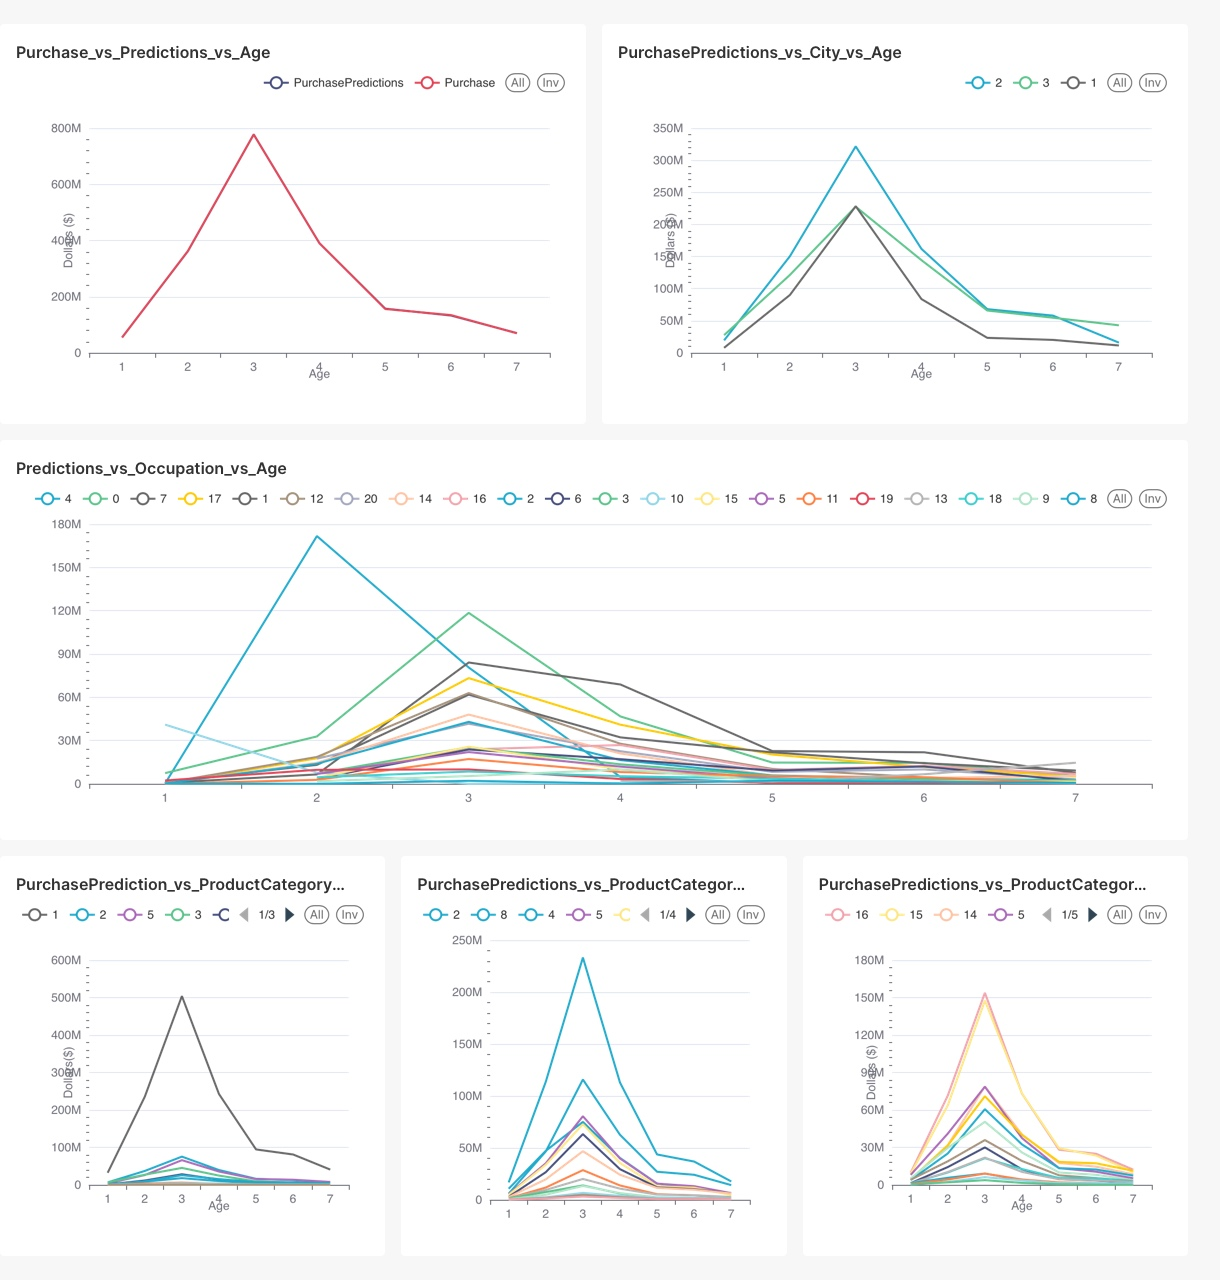

<br>
<br>
<br>
<hr>

In this example we wanted to modelize the purchase depending on consumers profil features. As the purchase is a continuous variable, selecting a model is straight forward with a linear regression. To speed up the process of discovering the best model, the polynomial parameters search was automated using GridSearchCv. 
In this example, we chose an overfitted model on purpose, as close to the dataset as possible. The criteria picked to select the best model is RMSE.  Depending on the end user use case, the model could be tuned differently to better generalize by doing features selections, or regularisation, and using R2 as a best model criteria rather than RMSE. 
<br>
<br>
<br>
<hr>








<h1><u>IV - Example of CLASSIFICATION</u></h1>

Note: the dataset is a pharmaceutical drug type classification depending on patient's profil <br>
<i>Ref: https://www.kaggle.com/datasets/prathamtripathi/drug-classification </i>

<h3>1-  Data investigation and cleaning </h3>
<h3>2- Seaborn bivariate visualization </h3>
<h3>3- Model 1st approach: LogisticRegression </h3>
<h3>4- To go futher | Model 2nd approach: KNN </h3>
<h3>5- To go further | Model 3rd approach: GradientBoostingClassifier<h3>



fig.3: Classification model selection

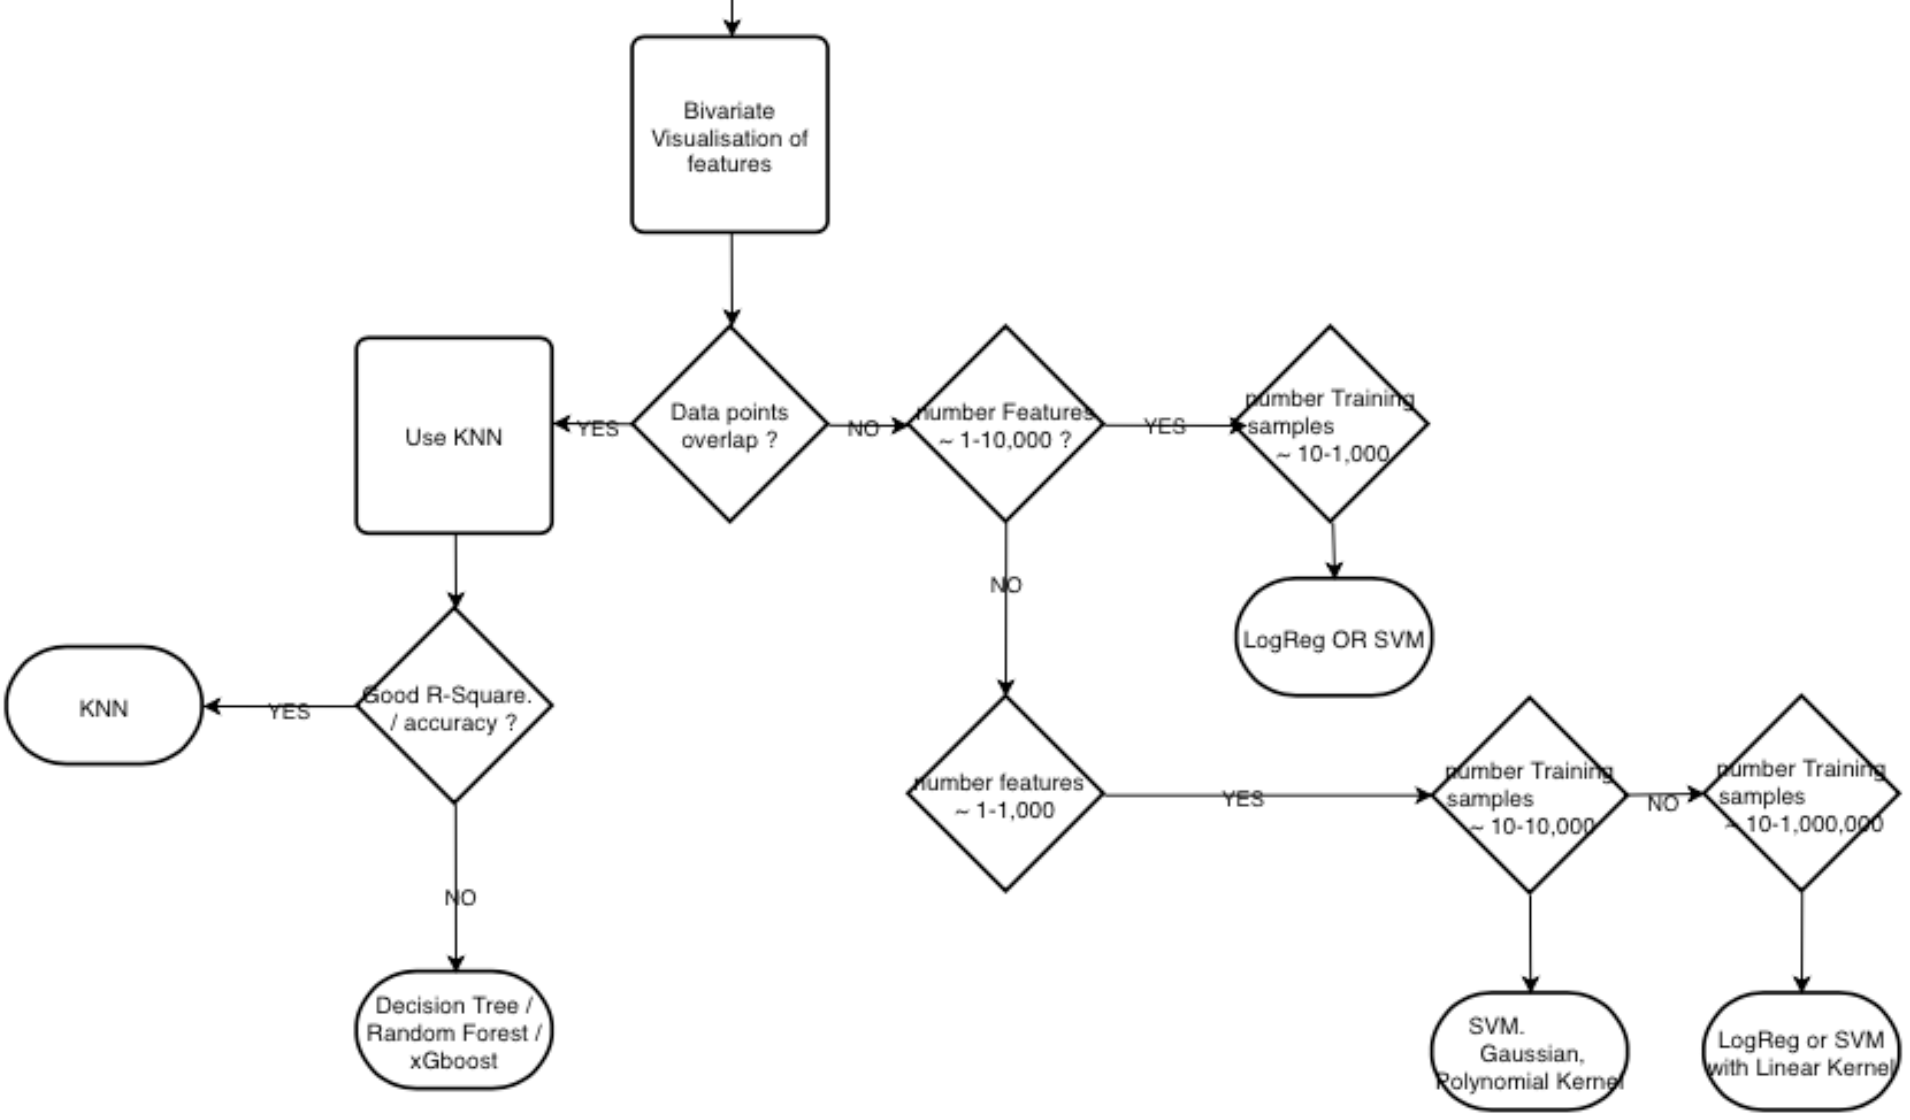

In [10]:
file_c = "data/drug200.csv"
df_c = pd.read_csv(file_c)

df_c

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


<h3>1-  Data investigation and cleaning </h3>

In [304]:
df_c.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [305]:
df_c.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [306]:
df_c.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [307]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [308]:

#Let's observe the categorical value to check the balance of the dataset
print(' -sex- \n', df_c.Sex.value_counts(), '\n')
print('-BP- \n',df_c.BP.value_counts(), '\n')
print('-Chol- \n ',df_c.Cholesterol.value_counts(), '\n')
print('-Drug- \n',df_c.Drug.value_counts(), '\n')


 -sex- 
 M    104
F     96
Name: Sex, dtype: int64 

-BP- 
 HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64 

-Chol- 
  HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64 

-Drug- 
 DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64 



In [11]:
df_c['BP'] = df_c['BP'].apply(lambda x: 'BP_'+x)
df_c['Cholesterol']= df_c['Cholesterol'].apply(lambda x:'Chol_'+x)

In [12]:
df_c

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,BP_HIGH,Chol_HIGH,25.355,DrugY
1,47,M,BP_LOW,Chol_HIGH,13.093,drugC
2,47,M,BP_LOW,Chol_HIGH,10.114,drugC
3,28,F,BP_NORMAL,Chol_HIGH,7.798,drugX
4,61,F,BP_LOW,Chol_HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,BP_LOW,Chol_HIGH,11.567,drugC
196,16,M,BP_LOW,Chol_HIGH,12.006,drugC
197,52,M,BP_NORMAL,Chol_HIGH,9.894,drugX
198,23,M,BP_NORMAL,Chol_NORMAL,14.020,drugX


In [13]:
df_c['Sex'] = pd.get_dummies(df_c['Sex'],drop_first=True) 
BP_dummies = pd.get_dummies(df_c['BP'],drop_first=False) 
chol_dummies = pd.get_dummies(df_c['Cholesterol'], drop_first=True)


In [14]:
df_c = df_c.drop(['BP','Cholesterol'],axis=1)


In [15]:
df_c.columns

Index(['Age', 'Sex', 'Na_to_K', 'Drug'], dtype='object')

In [16]:
df_c = pd.concat([df_c,BP_dummies,chol_dummies],axis=1)
drug = df_c.Drug
df_c = df_c.drop(['Drug'],axis=1)
df_c = pd.concat([df_c,drug],axis=1)

In [17]:
df_c

,Age,Sex,Na_to_K,BP_HIGH,BP_LOW,BP_NORMAL,Chol_NORMAL,Drug
0,23,0,25.355,1,0,0,0,DrugY
1,47,1,13.093,0,1,0,0,drugC
2,47,1,10.114,0,1,0,0,drugC
3,28,0,7.798,0,0,1,0,drugX
4,61,0,18.043,0,1,0,0,DrugY
...,...,...,...,...,...,...,...,...
195,56,0,11.567,0,1,0,0,drugC
196,16,1,12.006,0,1,0,0,drugC
197,52,1,9.894,0,0,1,0,drugX
198,23,1,14.020,0,0,1,1,drugX


In [18]:
# Let's replace the Drug categories by digits
df_c['Drug'] = df_c['Drug'].apply(lambda x: x.lower())
df_c['Drug'].value_counts()

drugy    91
drugx    54
druga    23
drugc    16
drugb    16
Name: Drug, dtype: int64

In [19]:
df_c

,Age,Sex,Na_to_K,BP_HIGH,BP_LOW,BP_NORMAL,Chol_NORMAL,Drug
0,23,0,25.355,1,0,0,0,drugy
1,47,1,13.093,0,1,0,0,drugc
2,47,1,10.114,0,1,0,0,drugc
3,28,0,7.798,0,0,1,0,drugx
4,61,0,18.043,0,1,0,0,drugy
...,...,...,...,...,...,...,...,...
195,56,0,11.567,0,1,0,0,drugc
196,16,1,12.006,0,1,0,0,drugc
197,52,1,9.894,0,0,1,0,drugx
198,23,1,14.020,0,0,1,1,drugx


In [20]:
def convertOutputToDigit(x):
    refDrug = {'druga':0,'drugb':1,'drugc':2,'drugx':3,'drugy':4}
    if x in refDrug.keys():
        return refDrug[x] 
    else:
        pass

In [21]:
df_c['Drug'] = df_c['Drug'].apply(convertOutputToDigit)
df_c

,Age,Sex,Na_to_K,BP_HIGH,BP_LOW,BP_NORMAL,Chol_NORMAL,Drug
0,23,0,25.355,1,0,0,0,4
1,47,1,13.093,0,1,0,0,2
2,47,1,10.114,0,1,0,0,2
3,28,0,7.798,0,0,1,0,3
4,61,0,18.043,0,1,0,0,4
...,...,...,...,...,...,...,...,...
195,56,0,11.567,0,1,0,0,2
196,16,1,12.006,0,1,0,0,2
197,52,1,9.894,0,0,1,0,3
198,23,1,14.020,0,0,1,1,3


<h3>2- Seaborn bivariate visualization </h3>

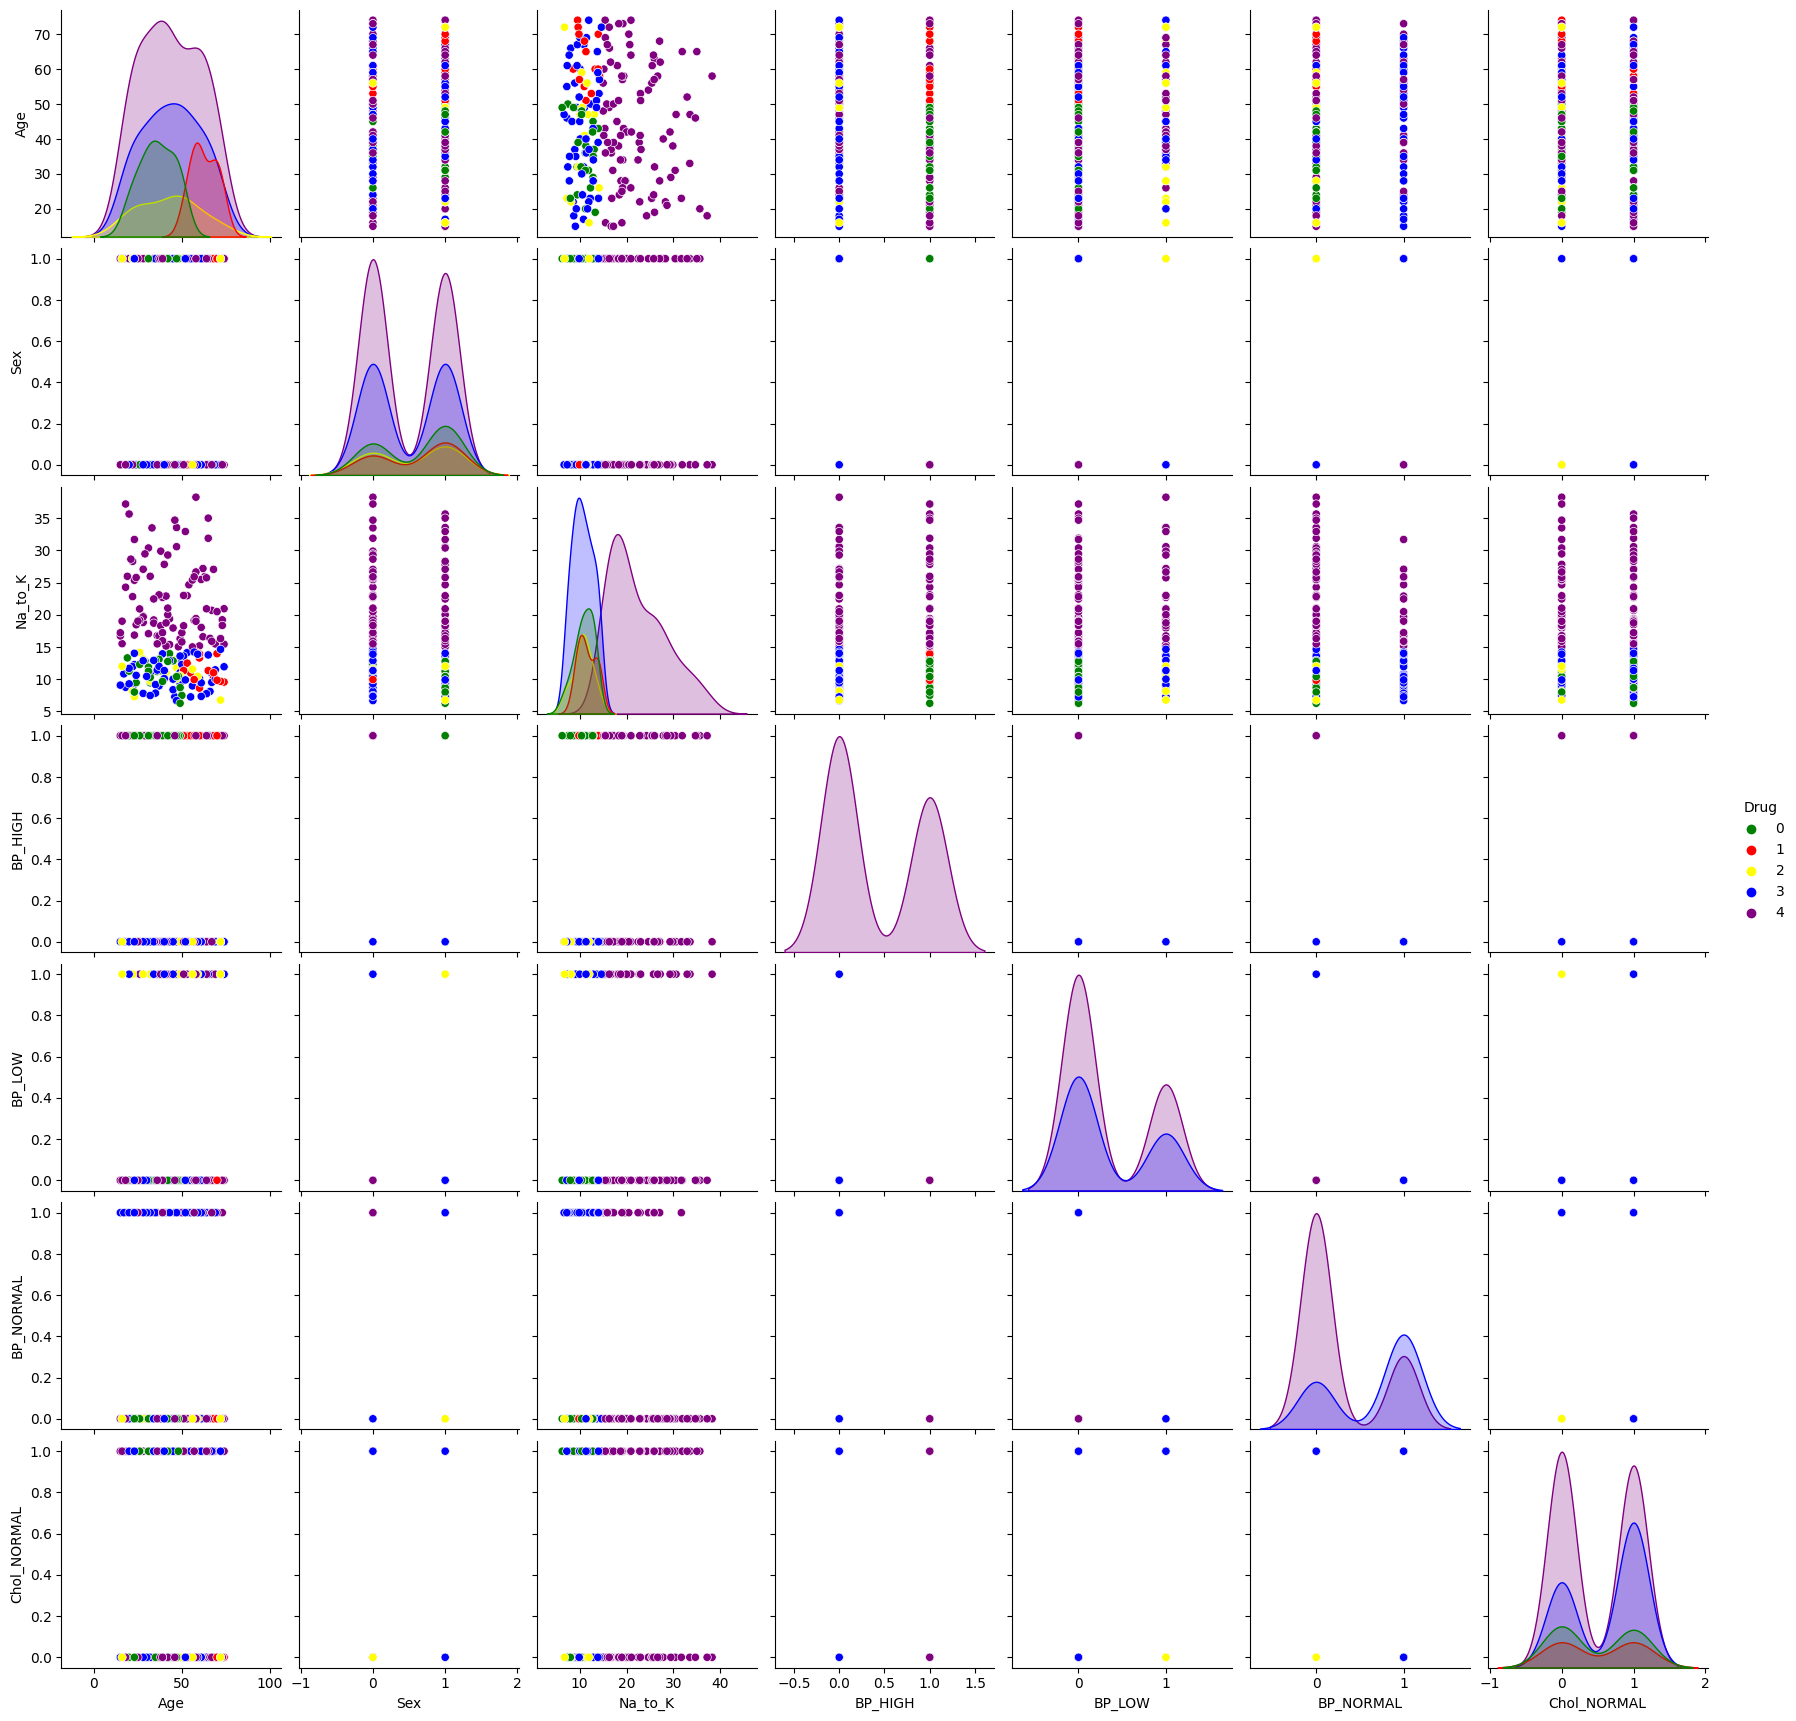

In [22]:
sns.pairplot(df_c, hue='Drug',palette=['green','red','yellow','blue','purple'])



We can observe there are clear groupings without too much overlap of the drugs categories,

so based on our recommandation algorithm approach, we use the LogisticRegression.

<h3> 3- Model 1st approach: LogisticRegression </h3>

In [23]:
x = df_c.drop(['Drug'],axis=1)
y = df_c[['Drug']]


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

Accuracy of logistic regression classifier on test set: 0.90


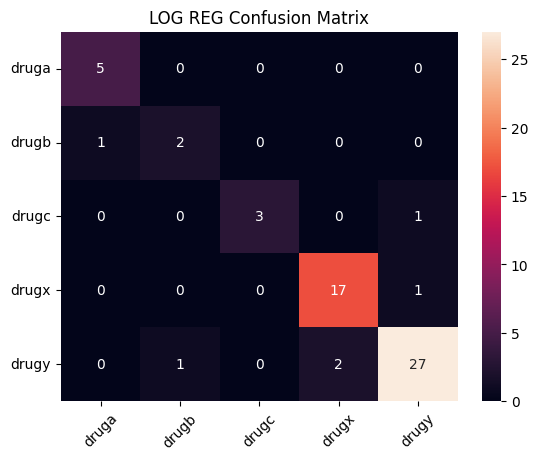

In [346]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve


y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Cm = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to a DataFrame with actual values
classRefDrug = {'druga': 0, 'drugb': 1, 'drugc': 2, 'drugx': 3, 'drugy': 4}
Cm_df = pd.DataFrame(Cm, index=classRefDrug.keys(), columns=classRefDrug.keys())


ax=plt.axes()
sns.heatmap(Cm_df, annot=True,annot_kws={'size':10,'rotation':0},ax=ax)
plt.title("LOG REG Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()



In [324]:
print(classification_report(y_test,y_pred, target_names=classRefDrug.keys()))

              precision    recall  f1-score   support

       druga       0.83      1.00      0.91         5
       drugb       0.67      0.67      0.67         3
       drugc       1.00      0.75      0.86         4
       drugx       0.89      0.94      0.92        18
       drugy       0.93      0.90      0.92        30

    accuracy                           0.90        60
   macro avg       0.87      0.85      0.85        60
weighted avg       0.90      0.90      0.90        60



In [325]:
# Probabability prediction of each class for each prediction
y_prob = logreg.predict_proba(x_test)
y_prob

array([[8.78678656e-02, 2.11410416e-03, 7.16256940e-01, 1.84250203e-01,
        9.51088719e-03],
       [2.89357384e-02, 1.66924654e-03, 1.52376445e-02, 7.67541793e-01,
        1.86615578e-01],
       [8.91685322e-04, 1.28897627e-05, 8.07628331e-03, 2.87167015e-03,
        9.88147471e-01],
       [2.02632521e-07, 1.16082950e-12, 7.65091223e-11, 2.66690354e-09,
        9.99999795e-01],
       [1.95155670e-03, 3.93842979e-06, 3.48809670e-04, 1.56530992e-02,
        9.82042596e-01],
       [5.08555743e-02, 1.35091999e-03, 9.46582023e-02, 5.47403105e-01,
        3.05732198e-01],
       [3.94355980e-02, 2.86728398e-03, 2.04887724e-02, 9.25737690e-01,
        1.14706558e-02],
       [2.32499369e-02, 8.15794779e-03, 1.11517232e-01, 6.51550646e-01,
        2.05524237e-01],
       [1.66036888e-02, 1.00351248e-03, 2.27644053e-01, 7.20031081e-02,
        6.82745637e-01],
       [3.10339720e-03, 3.12213925e-02, 1.87139502e-03, 9.62586134e-01,
        1.21768155e-03],
       [8.90353923e-01, 1.2624

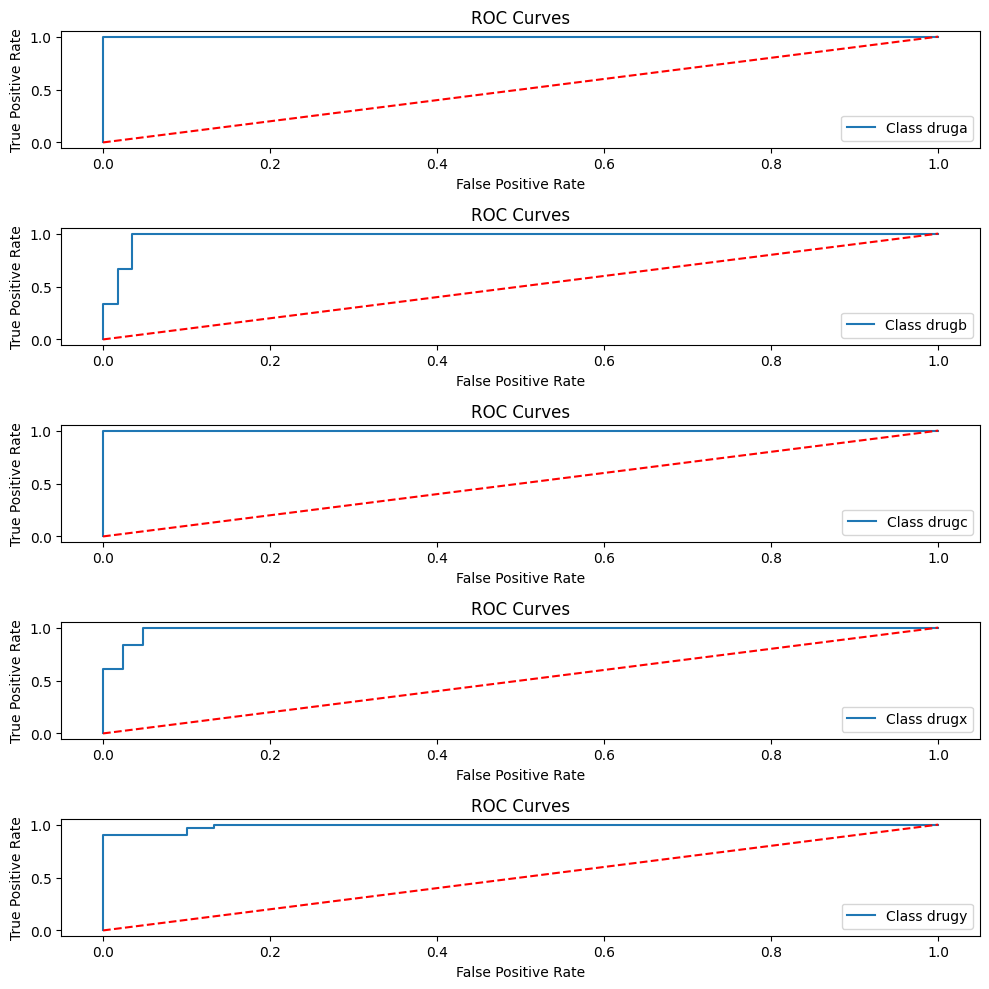

In [326]:

# Plot ROC curves for each class
ax = (ax1,ax2,ax3,ax4,ax5)
fig, ax = plt.subplots(5, figsize=(10,10))
for i in range(5):  # we have 5 classes
    
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, i], pos_label=i) # fpr: false positive rate / tpr: true positive rate
    ax[i].plot(fpr, tpr, label=f'Class {list(classRefDrug.keys())[i]}')

    ax[i].plot([0, 1], [0, 1],'r--')

    ax[i].set_xlabel('False Positive Rate')
    ax[i].set_ylabel('True Positive Rate')
    ax[i].set_title('ROC Curves')
    ax[i].legend()
plt.tight_layout()
plt.show()

- ROC Curve Shape: 

A ROC curve is typically a plot of TPR against FPR. It ranges from the bottom left corner (FPR = 0, TPR = 0) to the top right corner (FPR = 1, TPR = 1). The closer the curve is to the top-left corner, the better the classifier's performance.

- Although we could have better improve balance with more rows for Drug A,B,C, the f1_score (overall accuracy) achieved by our model is 90%. 

<h3>4- To go futher | Model 2nd approach: KNN </h3>
let's pretend the grouping was not so obvious. According to our model algorithm recommandation approach:
- we should investigate the r2 score from Knn. 
- If the Knn r2 score is acceptable, we could stick with Knn model. 
- If the Knn r2 score isn't acceptable, we could continue exploring models with Decision tree, randomForest, xgboost.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [343]:
# Hyperparameter tunning: 

from sklearn.model_selection import GridSearchCV


param_grid_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
                 'weights':['uniform', 'distance'],
                  'metric':['manhattan','euclidean']
                 }


# PolynomialRegression() : is a pipeline created earlier in a cell above
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs=-1) # n_jobs: // processing
grid_knn.fit(x_train, y_train)
print(grid_knn.best_params_)
print(grid_knn.best_score_)

/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was ex

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
0.7857142857142858


learn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this w

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
0.7857142857142858

Accuracy of KNN classifier on test set: 0.83


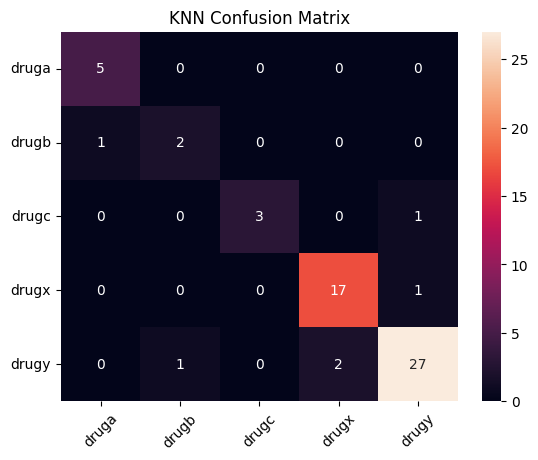

In [345]:
y_pred_knn = grid_knn.predict(x_test)
print('Accuracy of KNN classifier on test set: {:.2f}'.format(grid_knn.score(x_test, y_test)))

Cm_knn = confusion_matrix(y_test, y_pred_knn)

# Convert the confusion matrix to a DataFrame with actual values
classRefDrug = {'druga': 0, 'drugb': 1, 'drugc': 2, 'drugx': 3, 'drugy': 4}
Cm_knn_df = pd.DataFrame(Cm_knn, index=classRefDrug.keys(), columns=classRefDrug.keys())


ax=plt.axes()
sns.heatmap(Cm_df, annot=True,annot_kws={'size':10,'rotation':0},ax=ax)
plt.title("KNN Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


A score of 80% is acceptable but wouldn't have been enough. We would have pushed with either:
- decision tree
- RandomForest
- xGBoost

Let's try xgBoost: 


<h3>5- To go further | Model 3rd approach: GradientBoostingClassifier<h3>

In [38]:
#!pip install scikit-learn --upgrade

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.tree import export_graphviz

In [36]:
parameters = {
    "loss":['deviance'], #scikit <1.0
    "learning_rate": [0.01, 0.05, 0.15, 0.30],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ['friedman_mse', 'squared_error'],
    "subsample":[0.5, 0.8, 1.0],
    "n_estimators":[20,50,100],
    "random_state":[42]
    }

grid_gbc = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=1)

grid_gbc.fit(x_train, y_train)
print(grid_gbc.score(x_train, y_train))
print(grid_gbc.best_params_)

1.0
{'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 100, 'random_state': 42, 'subsample': 0.5}


Accuracy of xGBoost classifier on test set: 0.98


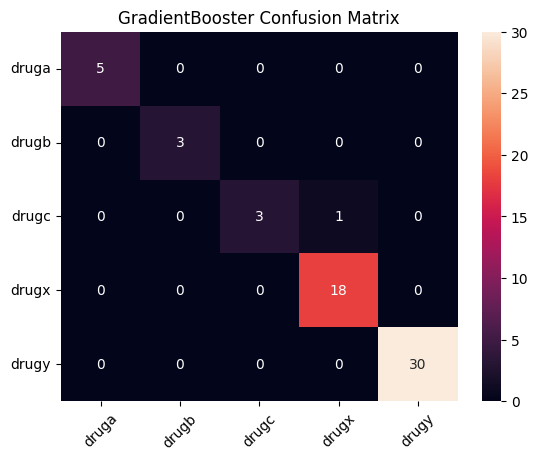

In [40]:
y_pred_gbc = grid_gbc.predict(x_test)

print('Accuracy of xGBoost classifier on test set: {:.2f}'.format(grid_gbc.score(x_test, y_test)))

Cm_gbc = confusion_matrix(y_test, y_pred_gbc)

# Convert the confusion matrix to a DataFrame with actual values
classRefDrug = {'druga': 0, 'drugb': 1, 'drugc': 2, 'drugx': 3, 'drugy': 4}
Cm_gbc_df = pd.DataFrame(Cm_gbc, index=classRefDrug.keys(), columns=classRefDrug.keys())


ax=plt.axes()
sns.heatmap(Cm_gbc_df, annot=True,annot_kws={'size':10,'rotation':0},ax=ax)
plt.title("GradientBooster Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [39]:
print(classification_report(y_test,y_pred_gbs, target_names=classRefDrug.keys()))

              precision    recall  f1-score   support

       druga       1.00      1.00      1.00         5
       drugb       1.00      1.00      1.00         3
       drugc       1.00      0.75      0.86         4
       drugx       0.95      1.00      0.97        18
       drugy       1.00      1.00      1.00        30

    accuracy                           0.98        60
   macro avg       0.99      0.95      0.97        60
weighted avg       0.98      0.98      0.98        60



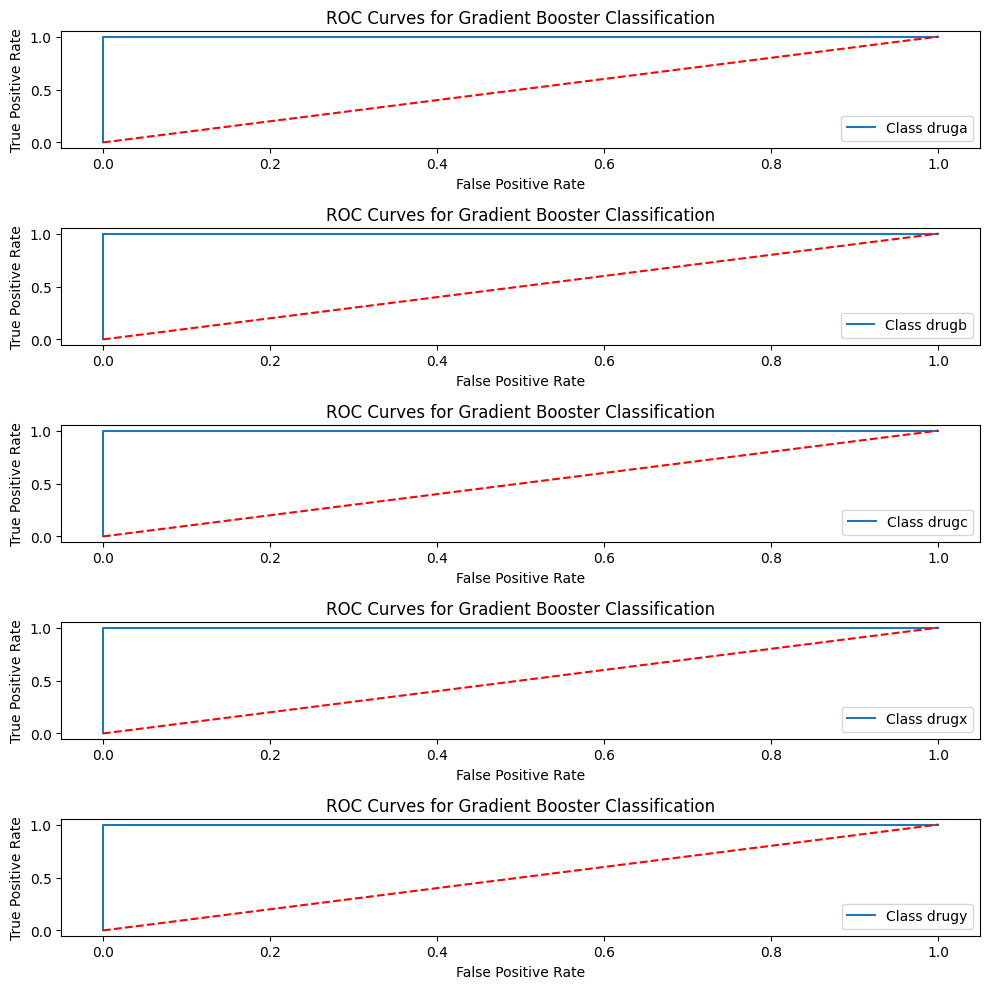

In [64]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve

y_proba_gbc = grid_gbc.predict_proba(x_test)
# Plot ROC curves for each class
ax = (ax1,ax2,ax3,ax4,ax5)
fig, ax = plt.subplots(5, figsize=(10,10))
for i in range(5):  # we have 5 classes
    
    fpr, tpr, _ = roc_curve(y_test, y_proba_gbc[:, i], pos_label=i) # fpr: false positive rate / tpr: true positive rate
    ax[i].plot(fpr, tpr, label=f'Class {list(classRefDrug.keys())[i]}')

    ax[i].plot([0, 1], [0, 1],'r--')

    ax[i].set_xlabel('False Positive Rate')
    ax[i].set_ylabel('True Positive Rate')
    ax[i].set_title('ROC Curves for Gradient Booster Classification')
    ax[i].legend()


plt.tight_layout()
plt.show();

<br>
<br>
<br>
<hr>


Following the model recommandation method, we have 1st picked the LogisticRegression model which gave an accuracy of 90%.
Here the dataset if fairly small (200 rows) so we could have played with the different other types of modelisation method.
- Should the dataset had been bigger and with bivariate features overlapping, the KNN model would have had allow us to get a quick model without spending too much time training it. On this specific dataset KNN gave 83% accuracy.
- We then went forward and picked the next model on the recommandation method i.e the gradientBooster which gave the best accuracy of 98%. Although showing a great accuracy overall, this model took the longer time to train.

<br>
<br>
<br>
<hr>


<h1><u>V - CONCLUSION </u></h1>

In the case of modelizing a continuous variable, the choice is simply to aim for linear regression. Things are more delicate when dealing with classification models as the model to be picked depends on the size of the dataset, the desired accuracy, the allowed time to trained the model. 
It's a trade-off between training time vs accuracy that is highlighted in the model recommandation approach.
Based on the results we obtained on classification, small datasets would better be modelized with decision tree models for better accuracy, while bigger datasets should use the model recommandation approach.

